<a href="https://colab.research.google.com/github/saleemhamo/ecg-data-feature-engineering/blob/main/Feature_Selection_Filtering_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import pearsonr
from sklearn.model_selection import LeaveOneGroupOut
import json
import matplotlib.pyplot as plt

### Prepare Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/University/AI & ML - Case Study 3/

Mounted at /content/drive
/content/drive/MyDrive/University/AI & ML - Case Study 3


In [ ]:
feature_names = pd.read_csv('feature_names.csv').columns.tolist()
labels = pd.read_csv('labels.csv', names=['label'])
df_data = pd.read_csv('data.csv', header=None, names=feature_names)

In [ ]:
X = df_data
y = labels

# Encode categorical variables if needed
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# KBinsDiscretizer is an algorithm that implements discretization (also known as quantization or binning) to transform continuous features into discrete ones

# Discretize the target variable
num_bins = 2  # Adjust as needed (As we have two classes only)
est = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
y_discrete = est.fit_transform(y.values.reshape(-1, 1)).flatten()

### Optimizing classifiers parameters

In [ ]:
from sklearn.model_selection import GridSearchCV, LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_data = X
test_data = y_discrete
groups = [i // 10 for i in range(len(train_data))]

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=LeaveOneGroupOut().split(train_data, test_data, groups))
rf_grid_search.fit(train_data, test_data)

# K-Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_grid_search = GridSearchCV(knn_clf, knn_param_grid, cv=LeaveOneGroupOut().split(train_data, test_data, groups))
knn_grid_search.fit(train_data, test_data)

# Support Vector Machine Classifier
svm_clf = SVC()
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(svm_clf, svm_param_grid, cv=LeaveOneGroupOut().split(train_data, test_data, groups))
svm_grid_search.fit(train_data, test_data)

# Print the best parameters for each classifier
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("K-Nearest Neighbors Best Parameters:", knn_grid_search.best_params_)
print("Support Vector Machine Best Parameters:", svm_grid_search.best_params_)


Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
K-Nearest Neighbors Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Support Vector Machine Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


# Filtering Methods

## Train the data without feature engineering

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'labels' contains the corresponding labels for each data point
# Adjust the labels accordingly based on your dataset
# labels = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_data, labels['label'], test_size=0.2, random_state=42)

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# k-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the classifiers
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

classification_rep_svm = classification_report(y_test, y_pred_svm)
classification_rep_rf = classification_report(y_test, y_pred_rf)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Print results
print("Support Vector Machine (SVM) results:")
print(f"Accuracy: {accuracy_svm:.2f}")
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", classification_rep_svm)

print("\nRandom Forest results:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", classification_rep_rf)

print("\nk-Nearest Neighbors (KNN) results:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", classification_rep_knn)


Support Vector Machine (SVM) results:
Accuracy: 0.81
Confusion Matrix:
 [[15  6]
 [ 1 14]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.71      0.81        21
         1.0       0.70      0.93      0.80        15

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.81        36


Random Forest results:
Accuracy: 0.86
Confusion Matrix:
 [[18  3]
 [ 2 13]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.86      0.88        21
         1.0       0.81      0.87      0.84        15

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36


k-Nearest Neighbors (KNN) results:
Accuracy: 0.81
Confusion Matrix:
 [[17  4]
 [ 3 12]]
Classification Report:
               pre

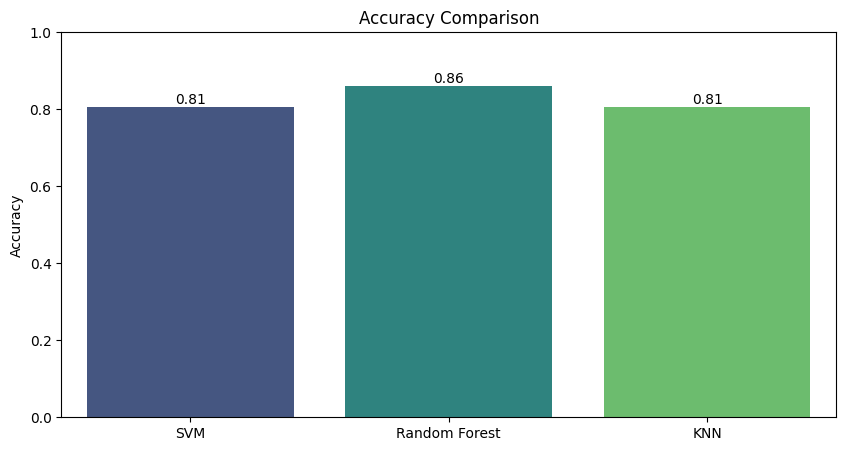

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define predictions for each classifier
y_preds = [y_pred_svm, y_pred_rf, y_pred_knn]
models = ['SVM', 'Random Forest', 'KNN']

# Accuracy Bar Plot with Numeric Values
plt.figure(figsize=(10, 5))
accuracy_values = [accuracy_score(y_test, y_pred) for y_pred in y_preds]
bar_plot = sns.barplot(x=models, y=accuracy_values, palette='viridis')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)
plt.ylabel('Accuracy')

# Display numeric values on each bar
for i, val in enumerate(accuracy_values):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom')

plt.show()

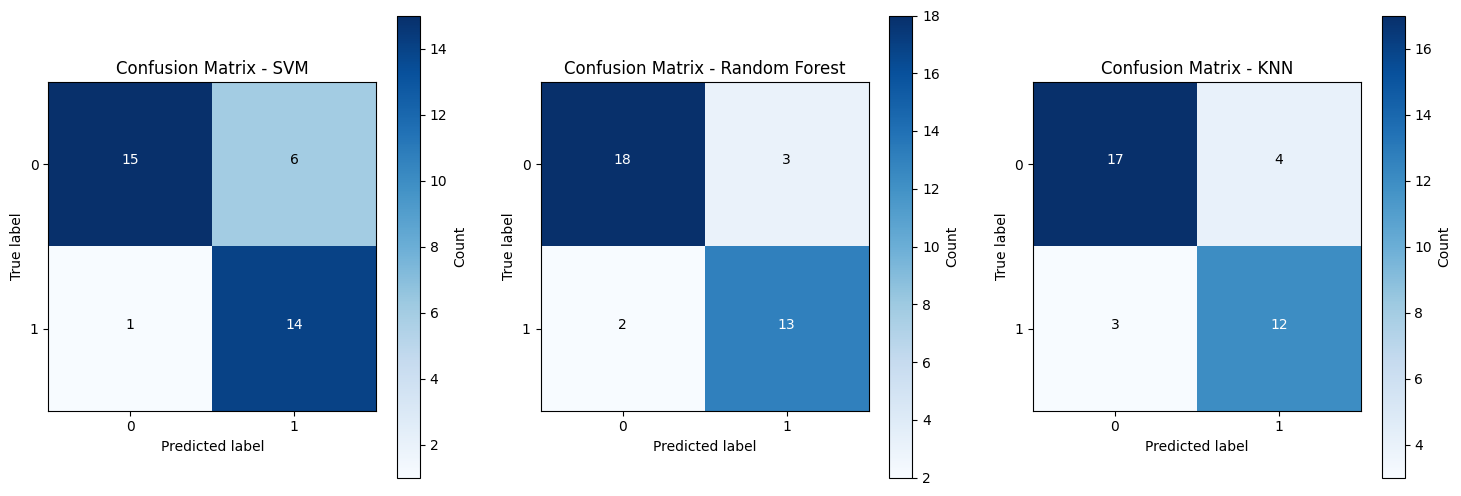

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

# Function to plot confusion matrix
def plot_confusion_matrix(ax, cm, classes, title, cmap=plt.cm.Blues):
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

    # Add colorbar to the right
    cbar = ax.figure.colorbar(im, ax=ax, orientation='vertical')
    cbar.set_label('Count')

# Generate and plot confusion matrix for each classifier in subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, model in enumerate(models):
    cm = confusion_matrix(y_test, y_preds[i])
    plot_confusion_matrix(axes[i], cm, classes=['0', '1'], title=f'Confusion Matrix - {model}')

plt.show()

## Step 1: Measure relevance of individual features

In [ ]:
f_statistic, p_values = f_classif(X, y_discrete)

# Chi-Square
chi2_scores, _ = chi2(X, y_discrete)

# Mutual Information
mutual_info_scores = mutual_info_classif(X, y_discrete)

# Create a DataFrame to store scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'P_values': p_values,
    'Chi2': chi2_scores,
    'F_statistic': f_statistic,
    'Mutual_Information': mutual_info_scores
})

In [ ]:
feature_scores

,Feature,P_values,Chi2,F_statistic,Mutual_Information
0,alpha_ec_0,0.000505,1.320710,12.553564,0.050571
1,alpha_ec_1,0.001015,1.133364,11.165557,0.000000
2,alpha_ec_2,0.001178,1.053551,10.872416,0.000000
3,alpha_ec_3,0.000701,1.272496,11.898726,0.073688
4,alpha_ec_4,0.000190,1.379896,14.527454,0.047962
...,...,...,...,...,...
427,ratio_theta_43,0.845582,0.024121,0.038042,0.034912
428,ratio_theta_44,0.242387,0.752748,1.375787,0.019688
429,ratio_theta_45,0.769756,0.048204,0.085931,0.000000
430,ratio_theta_46,0.958525,0.001654,0.002712,0.027933


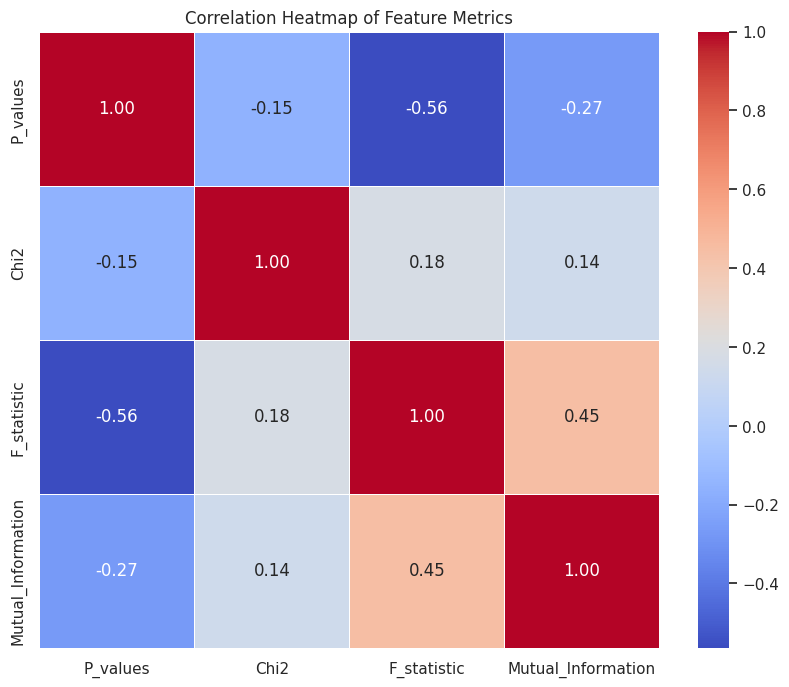

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for the heatmap
heatmap_data = feature_scores[['P_values', 'Chi2', 'F_statistic', 'Mutual_Information']]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Feature Metrics')
plt.show()


## Step 2: Rank features by relevance (Total Score)

In [ ]:
feature_scores['Total_Score'] = feature_scores.sum(axis=1)
feature_scores_sorted = feature_scores.sort_values(by='Total_Score', ascending=False)

<ipython-input-16-60e98547b964>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_scores['Total_Score'] = feature_scores.sum(axis=1)


In [ ]:
feature_scores_sorted

,Feature,P_values,Chi2,F_statistic,Mutual_Information,Total_Score
293,ratio_alpha_5,1.163308e-02,125.831095,6.499659,0.083703,132.426091
370,ratio_beta_34,2.752280e-11,7.008998,50.515116,0.106034,57.630149
371,ratio_beta_35,1.804678e-09,7.030647,40.234428,0.108232,47.373308
291,ratio_alpha_3,7.635829e-05,30.121341,16.402362,0.044410,46.568189
373,ratio_beta_37,3.003193e-09,7.225004,39.018106,0.135265,46.378376
...,...,...,...,...,...,...
162,alpha_eo_18,7.595843e-01,0.005983,0.093941,0.000000,0.859508
75,beta_ec_27,6.968718e-01,0.009319,0.152239,0.000000,0.858429
198,beta_eo_6,7.465586e-01,0.006631,0.104770,0.000000,0.857959
163,alpha_eo_19,7.422676e-01,0.006296,0.108481,0.000000,0.857044


## Step 3: Keep top K relevant features using cross-validation

Question? What is the "best" k?

### Finding k

####Using GridSearchCV with SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, LeaveOneGroupOut
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
import numpy as np

# Define the groups based on your sample grouping (every 10 rows)
groups = np.repeat(np.arange(len(X) // 10), 10)

# Initialize SVM classifier
svm_clf = SVC(kernel='linear', C=1)

# Choose a range of k values from 1 to 432
k_values = range(1, 433)

# Create a pipeline with feature selection and SVM classifier
pipeline = Pipeline([
    ('k_best', SelectKBest(score_func=f_classif)),
    ('svm', SVC(kernel='linear', C=1))
])

# Use GridSearchCV with Leave One Group Out cross-validation
param_grid = {'k_best__k': k_values}  # Use 'k_best__k' to specify the parameter for SelectKBest
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=LeaveOneGroupOut().split(X, y, groups))
grid_search.fit(X, y.values.ravel())

# Display the best parameters and corresponding mean cross-validation score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Accuracy: {grid_search.best_score_}')


Best Parameters: {'k_best__k': 151}
Mean Accuracy: 0.8944444444444445


####Using GridSearchCV with PCA and SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, LeaveOneGroupOut
from sklearn.pipeline import Pipeline
import numpy as np

# Define the groups based on your sample grouping (every 10 rows)
groups = np.repeat(np.arange(len(X) // 10), 10)

# Initialize SVM classifier
svm_clf = SVC(kernel='linear', C=1)

# Choose a range of n_components values (number of principal components) from 1 to the number of features (432)
n_components_values = range(1, min(X.shape[1], 433))

# Create a pipeline with PCA and SVM classifier
pipeline = Pipeline([
    ('pca', PCA()),
    ('svm', SVC(kernel='linear', C=1))
])

# Use GridSearchCV with Leave One Group Out cross-validation
param_grid = {'pca__n_components': n_components_values}  # Use 'pca__n_components' to specify the number of components
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=LeaveOneGroupOut().split(X, y, groups))
grid_search.fit(X, y.values.ravel())

# Display the best parameters and corresponding mean cross-validation score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Accuracy: {grid_search.best_score_}')


Best Parameters: {'pca__n_components': 89}
Mean Accuracy: 0.8777777777777778


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
4698 fits failed out of a total of 7758.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist

####Using GridSearchCV, SelectKBest, RFE, PCA with RandomForest, LASSO and SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, RFE, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, LeaveOneGroupOut
from sklearn.pipeline import Pipeline
import numpy as np

# Assuming X is your feature matrix and y is your target variable

# Define the groups based on your sample grouping (every 10 rows)
groups = np.repeat(np.arange(len(X) // 10), 10)

# Initialize classifiers for feature selection methods
svc_clf = SVC(kernel='linear', C=1)
rf_clf = RandomForestClassifier()
lasso_clf = Lasso(alpha=0.1)

# Choose a range of k values from 1 to the number of features
k_values = range(1, X.shape[1] + 1)

# Choose a range of n_components values for PCA
n_components_values = range(1, min(X.shape[1], 433))

# Create a pipeline with feature selection methods and SVM classifier
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=mutual_info_classif)),  # You can replace this with other methods
    ('svm', SVC(kernel='linear', C=1))
])

# Use GridSearchCV with Leave One Group Out cross-validation
param_grid = {
    'feature_selection__k': k_values,  # Replace 'k' with specific parameter names for other methods
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=LeaveOneGroupOut().split(X, y, groups))
grid_search.fit(X, y.values.ravel())

# Display the best parameters and corresponding mean cross-validation score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Accuracy: {grid_search.best_score_}')


Best Parameters: {'feature_selection__k': 202}
Mean Accuracy: 0.9055555555555556


### Finding k manually

In [ ]:
X = X
y = y
feature_scores_values = feature_scores_sorted
num_of_features = 50

scores_by_classifier = {}
for k in range(1, 432 + 1):
  scores_by_classifier[k] = {}

  # Select top K features
  selected_features = feature_scores_values['Feature'][:k]

  # Create a new DataFrame with only the selected features
  X_selected = X[selected_features]

  groups = np.repeat(np.arange(len(X)//10), 10)
  logo = LeaveOneGroupOut()

  # Define classifiers
  rf_clf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
  knn_clf = KNeighborsClassifier(n_neighbors=3, p=1, weights='uniform')
  # svm_clf = SVC(kernel='linear', C=1, gamma='scale')
  svm_clf = SVC(kernel='linear', C=1)

  y_binary = (y.values > y.values.mean()).astype(int)

  # Iterate over classifiers
  for clf, clf_name in zip([rf_clf, knn_clf, svm_clf], ['Random Forest', 'KNN', 'SVM']):
      # Use leave-one-out cross-validation to evaluate the performance of each classifier with the selected features
      cv_scores = cross_val_score(clf, X_selected, y_binary.ravel(), cv=logo.split(X_selected, y.values.ravel(), groups), error_score='raise')

      mean = np.mean(cv_scores)
      scores_by_classifier[k][clf_name] = mean

      # Display cross-validation scores
      # print(f'Leave-One-Out Cross-Validation Scores with {k} selected features ({clf_name}):')
      # print(cv_scores)
      # print(f'Mean Accuracy: {mean}')
      # print('\n')

####Plots

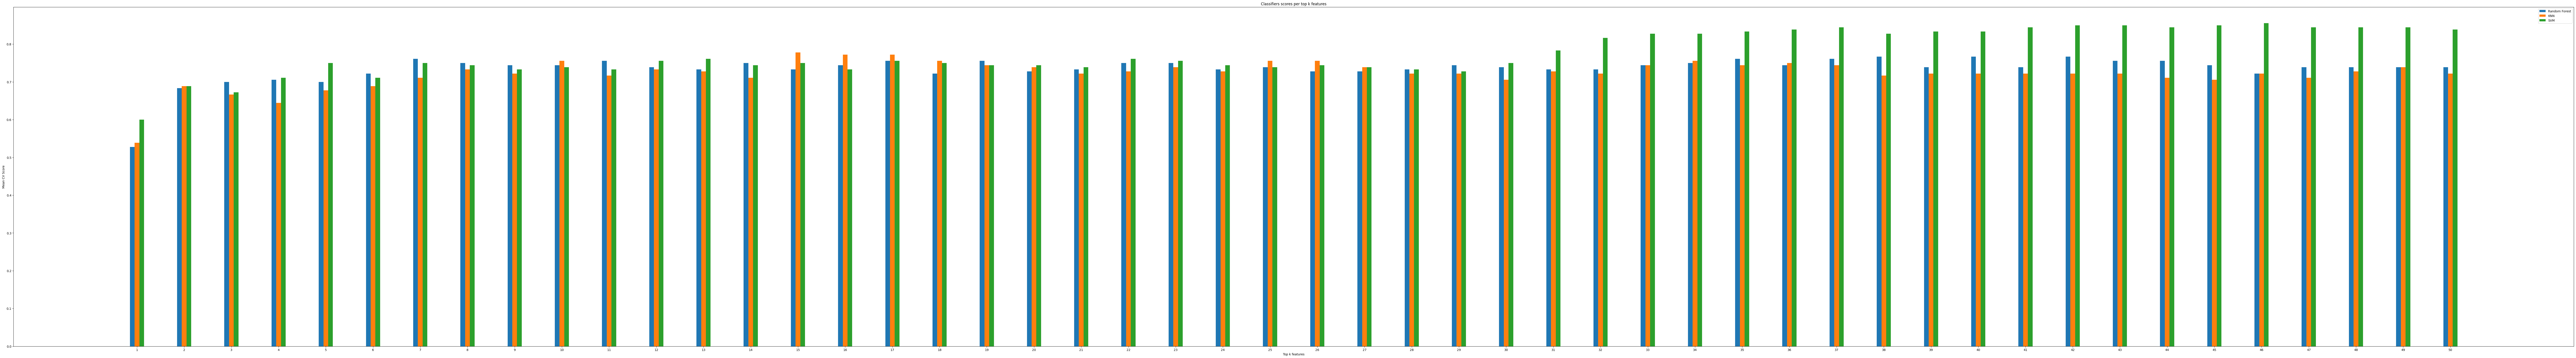

In [ ]:
data = scores_by_classifier

# Extract keys and values for plotting
keys = list(data.keys())
models = list(data[keys[0]].keys())
values = [[data[key][model] for key in keys] for model in models]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(150, 20))

# Set the width of the bars
bar_width = 0.1

# Plot each bar for each model
for i, model in enumerate(models):
    x_positions = [float(key) + i * bar_width for key in keys]
    ax.bar(x_positions, values[i], width=bar_width, label=model)

ax.set_xlabel('Top k features')
ax.set_ylabel('Mean CV Score')
ax.set_title('Classifiers scores per top k features')
ax.set_xticks([float(key) + (len(models) - 1) * bar_width / 2 for key in keys])
ax.set_xticklabels(keys)
ax.legend()
plt.show()

In [ ]:
# Read data from saved file
def read_data_from_file(file_path):
  # Open the file and load its content as JSON
  with open(file_path, 'r') as file:
      scores_dict = json.load(file)

  return scores_dict

In [ ]:
data = read_data_from_file('scores.txt')
data


{'1': {'Random Forest': 0.5277777777777778, 'KNN': 0.55, 'SVM': 0.6},
 '2': {'Random Forest': 0.6777777777777777,
  'KNN': 0.6777777777777777,
  'SVM': 0.6888888888888889},
 '3': {'Random Forest': 0.7055555555555555,
  'KNN': 0.7000000000000001,
  'SVM': 0.6722222222222223},
 '4': {'Random Forest': 0.7000000000000001,
  'KNN': 0.6888888888888889,
  'SVM': 0.711111111111111},
 '5': {'Random Forest': 0.6944444444444443,
  'KNN': 0.6611111111111111,
  'SVM': 0.75},
 '6': {'Random Forest': 0.7,
  'KNN': 0.6833333333333332,
  'SVM': 0.7111111111111111},
 '7': {'Random Forest': 0.7611111111111111,
  'KNN': 0.6833333333333332,
  'SVM': 0.75},
 '8': {'Random Forest': 0.7499999999999999,
  'KNN': 0.6944444444444444,
  'SVM': 0.7444444444444445},
 '9': {'Random Forest': 0.7444444444444445,
  'KNN': 0.6833333333333333,
  'SVM': 0.7333333333333333},
 '10': {'Random Forest': 0.7388888888888889,
  'KNN': 0.7111111111111111,
  'SVM': 0.7388888888888888},
 '11': {'Random Forest': 0.7444444444444444,
 

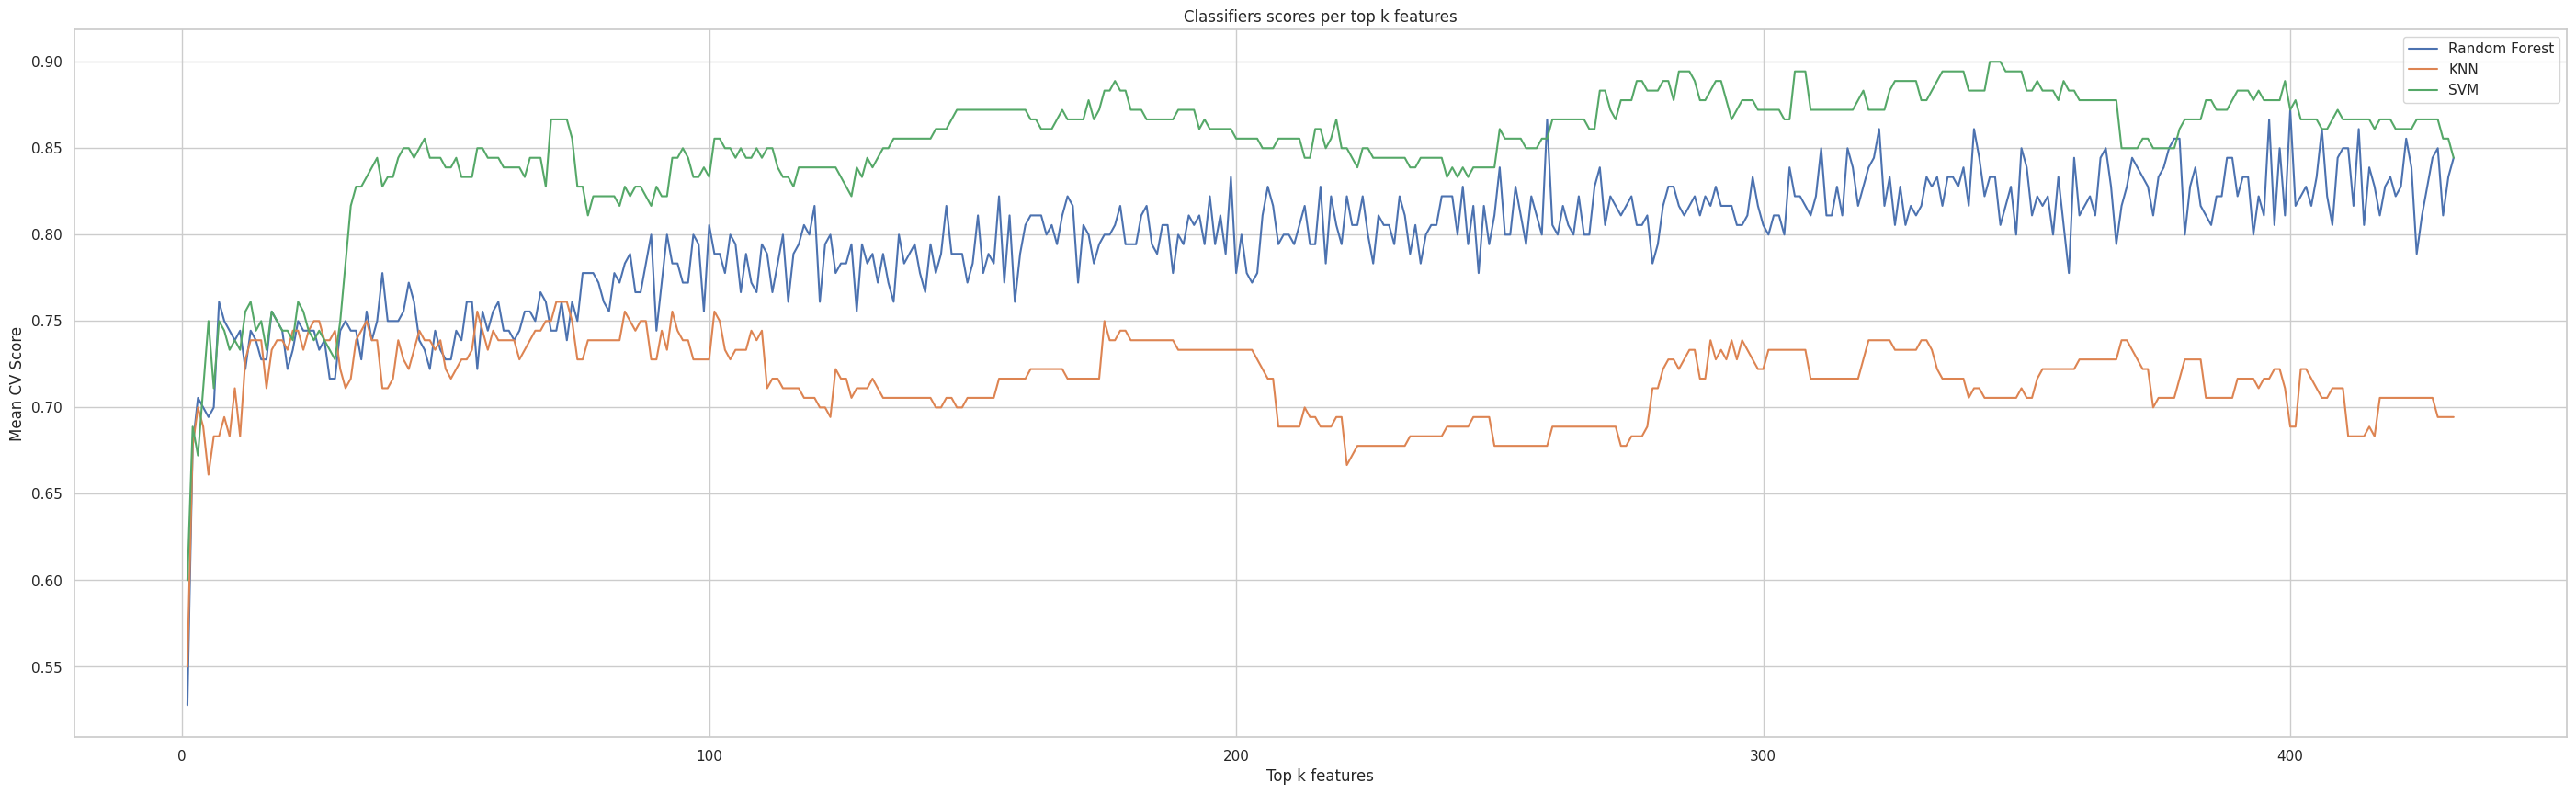

In [ ]:
data = read_data_from_file('scores.txt')

# Extract keys and values for plotting
keys = list(map(int, data.keys()))
models = list(data[str(keys[0])].keys())

# Set up a single subplot
fig, ax = plt.subplots(figsize=(35, 10))

# Plot each model on the same subplot with a continuous x-axis
for model in models:
    values = [data[str(key)][model] for key in keys]
    ax.plot(keys, values, label=model, linestyle='-')

ax.set_xlabel('Top k features')
ax.set_ylabel('Mean CV Score')
ax.set_title('Classifiers scores per top k features')
ax.legend()
plt.show()

In [ ]:
def find_max(scores_dict):
  max_rf = [-1000, 1]
  max_knn = [-1000, 1]
  max_svm = [-1000, 1]

  for i in range(1, len(scores_dict) + 1):
    s = scores_dict[str(i)]
    if s['Random Forest'] > max_rf[0]:
      max_rf = [s['Random Forest'], i]
    if s['KNN'] > max_knn[0]:
      max_knn = [s['KNN'], i]
    if s['SVM'] > max_svm[0]:
      max_svm = [s['SVM'], i]

  print('max_rf: ' + str(max_rf))
  print('max_knn: ' + str(max_knn))
  print('max_svm: ' + str(max_svm))

find_max(data)

max_rf: [0.8722222222222222, 400]
max_knn: [0.7611111111111112, 71]
max_svm: [0.8999999999999999, 343]


In [ ]:
def save_data(scores_file, file_name):
  # Save data
  with open(file_name, "w+") as scores_file:
    json.dump(scores, scores_file)  # encode dict into JSON